## Cricket Player Performance Prediction using machine learning

Predicting cricket player performance using machine learning involves a combination of data preprocessing, feature engineering, model selection, and evaluation.

In [ ]:
# Importing the necessary libraries from python modeules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Read the csv(common - seperated - value ) file by uploading the file

df = pd.read_csv("/content/Cricket_analysis_task4 - Sheet1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Serial No   11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Serial No,Player_ID
count,11149.00000,1.114900e+04
mean,5575.00000,2.259088e+05
std,3218.58341,1.942613e+05
min,1.00000,5.334000e+03
25%,2788.00000,4.749200e+04
50%,5575.00000,2.335140e+05
75%,8362.00000,3.217770e+05
max,11149.00000,1.158100e+06


In [ ]:
df.head()

,Serial No,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,########,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,########,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,########,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,04-Jan-10,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,05-Jan-10,ODI # 2938,Oshane Thomas,49619


In [ ]:
# Check submission of null values
df.isnull().sum()

Serial No     0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [ ]:
df.shape

(11149, 13)

In [ ]:
df.columns

Index(['Serial No', 'Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Batsman', 'Player_ID'],
      dtype='object')

In [ ]:
# Replace '-' with NaN in multiple columns
columns_to_clean = ['Bat1', 'BF', '4s', '6s', 'SR']  # List of columns to clean

for col in columns_to_clean:
    df[col] = df[col].replace('-', None)

In [ ]:
# Data Cleaning and Feature Engineering - Eg modifing 125* to 125, by removing unnecessary symbols
df['Bat1_numeric'] = df['Bat1'].str.extract('(\d+)').astype(float)
df['Bat1_numeric'] = pd.to_numeric(df['Bat1_numeric'], errors='coerce')

In [ ]:
# Drop rows with missing values in the record
df.dropna(subset=['Bat1_numeric', 'BF', '4s', '6s', 'SR'], inplace=True)

To remove outliers using multiple columns in Pandas, we can use the groupby function to group the data by one or more columns, and then apply a filtering operation to each group. Let's break down this code step by step: We start by loading our data into a Pandas DataFrame using the read_csv function.

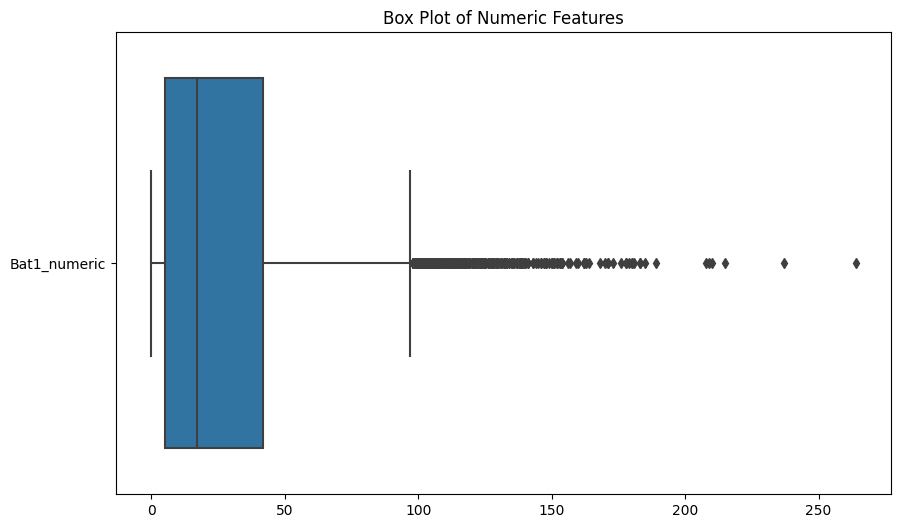

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns/features you want to visualize
columns_to_visualize = ['Bat1_numeric', 'BF', '4s', '6s', 'SR']

# Filter the data to include only numeric columns
numeric_data = df[columns_to_visualize]

# Create a horizontal box plot for numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data, orient='h')
plt.title("Box Plot of Numeric Features")
plt.show()

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart 🌈 that shows us how closely related different variables are.

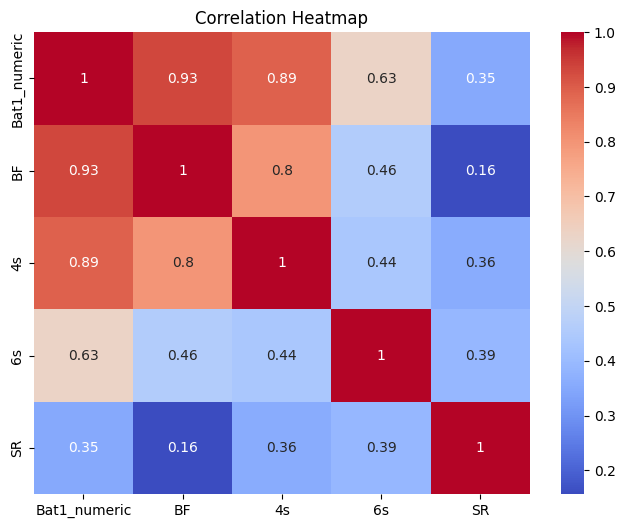

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Bat1_numeric', 'BF', '4s', '6s', 'SR']

# Filter the data to include only numeric columns
numeric_data = df[numeric_columns]

# Normalize the numeric data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(normalized_data, columns=numeric_columns).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The mean squared error calculates the average of the sum of the squared differences between a data point and the line of best fit. By virtue of this, the lower a mean sqared error, the more better the line represents the relationship.

In [ ]:
# Select relevant features and target
features = df[['Bat1_numeric', 'BF', '4s', '6s', 'SR']]
target = df['Runs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.7406524091009066e-28
